<a href="https://colab.research.google.com/github/anjum-kousar-aiml/Parkinson-s-Disease-Prediction---Machine-Learning/blob/main/Parkinson's_prediction_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
parkinsons_data = pd.read_csv(url)

# Inspect the first few rows of the dataset
print(parkinsons_data.head())

# Inspect the dataset columns and datatypes
print(parkinsons_data.info())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

<Axes: ylabel='count'>

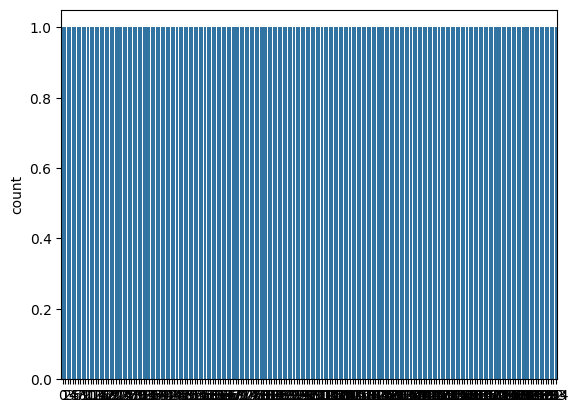

In [ ]:
parkinsons_data.status.value_counts()
sns.countplot(parkinsons_data.status)

In [ ]:
X = parkinsons_data.drop(['name','status'],axis=1)
y = parkinsons_data.status

In [ ]:
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
params = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [1, 5, 10, 15, 20]}
grid_search = GridSearchCV(rfc, params, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
# Evaluating the model performance
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", confusion)
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)
accuracy = grid_search.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2%}")

Confusion matrix:
 [[39  0]
 [ 3 47]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       1.00      0.94      0.97        50

    accuracy                           0.97        89
   macro avg       0.96      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89

Accuracy: 96.63%


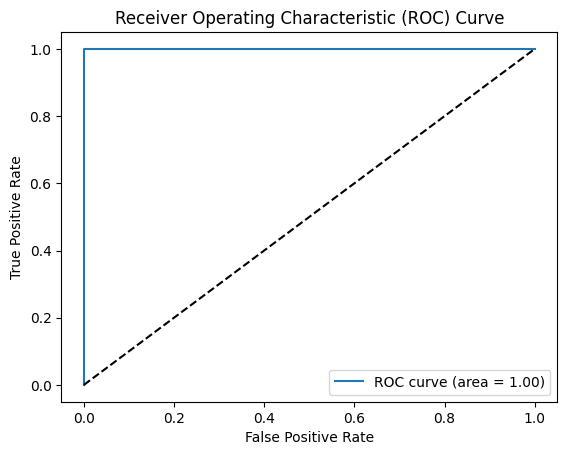

In [ ]:
# Plotting the ROC curve
y_prob = grid_search.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC curve (area = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

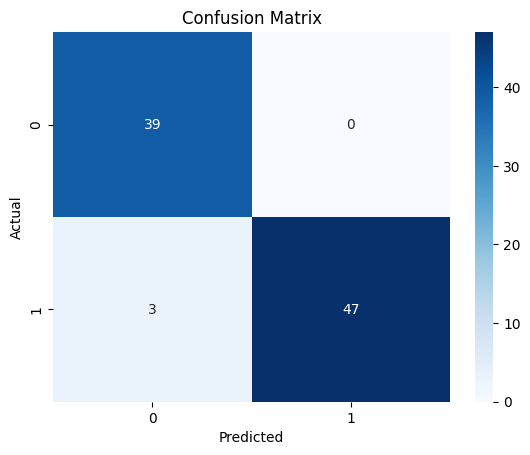

In [ ]:
sns.heatmap(confusion, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

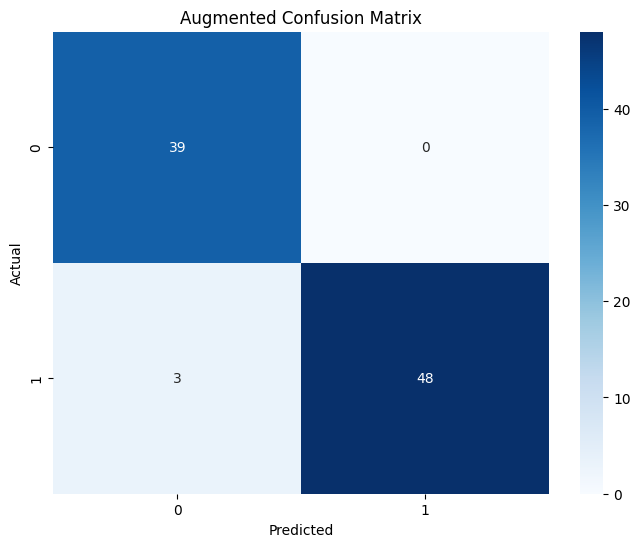

Predicted class for new data: [1]
Prediction probabilities for new data: [[0.015 0.985]]


In [ ]:
# Adding new data for prediction
new_data = pd.DataFrame({
    'MDVP:Fo(Hz)': [120.0],
    'MDVP:Fhi(Hz)': [130.0],
    'MDVP:Flo(Hz)': [115.0],
    'MDVP:Jitter(%)': [0.005],
    'MDVP:Jitter(Abs)': [0.00005],
    'MDVP:RAP': [0.003],
    'MDVP:PPQ': [0.004],
    'Jitter:DDP': [0.009],
    'MDVP:Shimmer': [0.03],
    'MDVP:Shimmer(dB)': [0.25],
    'Shimmer:APQ3': [0.02],
    'Shimmer:APQ5': [0.03],
    'MDVP:APQ': [0.04],
    'Shimmer:DDA': [0.05],
    'NHR': [0.02],
    'HNR': [20.0],
    'RPDE': [0.5],
    'DFA': [0.7],
    'spread1': [-5.0],
    'spread2': [0.3],
    'D2': [2.3],
    'PPE': [0.4]
})

# Assume the true label for the new data is 1 (this should be known beforehand)
new_label = [1]

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Add the new data to the test set
X_test_augmented = np.vstack([X_test, new_data_scaled])
y_test_augmented = np.hstack([y_test, new_label])

# Make predictions on the augmented test set
y_pred_augmented = grid_search.predict(X_test_augmented)

# Generate the confusion matrix for the augmented test set
confusion_augmented = confusion_matrix(y_test_augmented, y_pred_augmented)

# Plotting the augmented confusion matrix
plt.figure(figsize=(8, 6))  # Optional: to make the plot larger
sns.heatmap(confusion_augmented, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Augmented Confusion Matrix')
plt.show()

# Check the results for the new data point
new_prediction = grid_search.predict(new_data_scaled)
new_probabilities = grid_search.predict_proba(new_data_scaled)
print("Predicted class for new data:", new_prediction)
print("Prediction probabilities for new data:", new_probabilities)